# Final Project



In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.preprocessing import OneHotEncoder,label_binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve, 
    roc_auc_score
)

In [3]:
df = pd.read_csv("spotify-2023.csv")
display(df.head())

print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print("Columns:")
print(list(df.columns))

# Basic descriptive statistics for numeric and categorical columns
print("\nBasic Statistics (numeric and categorical):")
display(df.describe(include="all").transpose())

# Count missing values per column
print("\nMissing Values Per Column:")
missing_data = df.isna().sum().sort_values(ascending=False)
display(missing_data.to_frame("MissingCount"))

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6



Dataset contains 953 rows and 24 columns.
Columns:
['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

Basic Statistics (numeric and categorical):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
track_name,953,943,Daylight,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist(s)_name,953,645,Taylor Swift,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_count,953.0,NaN,NaN,NaN,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,NaN,NaN,NaN,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,NaN,NaN,NaN,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,NaN,NaN,NaN,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,NaN,NaN,NaN,5200.124869,7897.60899,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,NaN,NaN,NaN,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
streams,953,949,723894473,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_apple_playlists,953.0,NaN,NaN,NaN,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0



Missing Values Per Column:


,MissingCount
key,95
in_shazam_charts,50
track_name,0
artist(s)_name,0
liveness_%,0
instrumentalness_%,0
acousticness_%,0
energy_%,0
valence_%,0
danceability_%,0


In [4]:

# Using to_numeric() method with downcasting, converting neumeric into integers
df['streams'] = pd.to_numeric(df['streams'], downcast='integer', errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], downcast='integer', errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], downcast='integer', errors='coerce')

#Dropping columns that are not useful for one hot encoding
#drop_cols = {'track_name','artist(s)_name'}
#df = df.drop(columns=[c for c in drop_cols if c in df.columns])

#Dropping empty columns
df = df.dropna()


In [5]:
audio_features = [
    "bpm",
    "danceability_%",
    "valence_%",
    "energy_%",
    "acousticness_%",
    "instrumentalness_%",
    "liveness_%",
    "speechiness_%"
]

spotify_df = df[["track_name", "artist(s)_name"] + audio_features].dropna().copy()

spotify_df.head()

,track_name,artist(s)_name,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",125,80,89,83,31,0,8,4
1,LALA,Myke Towers,92,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,138,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,170,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,144,65,23,80,14,63,11,6


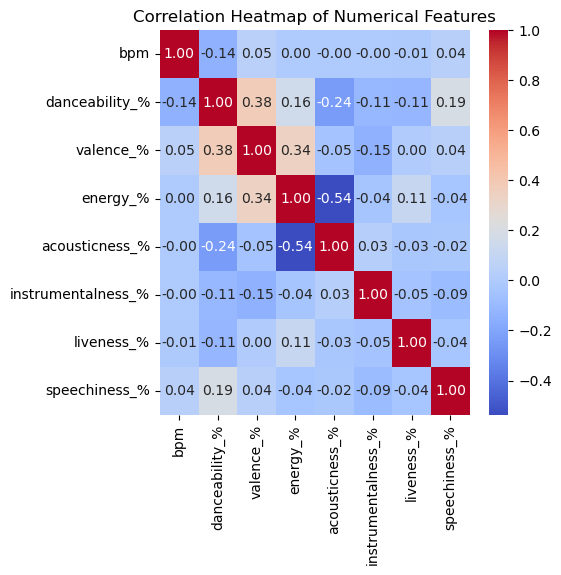

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5)) 

# Computes and displayes the correlation between all numerical features 
corr_matrix = spotify_df.corr(numeric_only=True)
corr_matrix

# Creates and displays Heatmap of to show correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [31]:
TARGET = "valence_%";

X = spotify_df[audio_features].values;

#print(df['energy_%'])

data = df[TARGET]
bins = [0, 20, 40, 60, 80,100]

temp = pd.cut(data, bins, labels=['0-20%','20-40%','40-60%','60-80%','80-100%'])

print(temp)


x = spotify_df[audio_features].values;
y = temp #spotify_df[TARGET] #].values;     #df[[TARGET]]

print("X_train shape: {}".format(x.shape))
print("y_train shape: {}".format(y.shape))

0      80-100%
1       60-80%
2       20-40%
3       40-60%
4       20-40%
        ...   
948     20-40%
949      0-20%
950    80-100%
951     60-80%
952     20-40%
Name: valence_%, Length: 748, dtype: category
Categories (5, object): ['0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']
X_train shape: (748, 8)
y_train shape: (748,)


In [32]:

# First, separate out 10% of the data as the test set
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size= 0.20,
    random_state= 42  # preserves class proportions
)

# Display shapes to confirm
print("Split sizes:")
print(f"  Train set: {X_train.shape[0]} samples,  {X_train.shape[1]} features")
print(f"  Test set : {X_test.shape[0]} samples,  {X_test.shape[1]} features")

# Optional: Verify class balance in each split
print("\nClass distribution (Train):")
display(y_train.value_counts(normalize=True).to_frame("Proportion"))

print("\nClass distribution (Test):")
display(y_test.value_counts(normalize=True).to_frame("Proportion"))

Split sizes:
  Train set: 598 samples,  8 features
  Test set : 150 samples,  8 features

Class distribution (Train):


,Proportion
valence_%,
40-60%,0.277592
60-80%,0.249164
20-40%,0.227425
80-100%,0.128763
0-20%,0.117057



Class distribution (Test):


,Proportion
valence_%,
40-60%,0.313333
20-40%,0.280000
60-80%,0.200000
80-100%,0.106667
0-20%,0.100000


In [33]:
model = SVC(kernel="rbf", probability=True, random_state=34)

scaler = StandardScaler()

# Normalizing the training and testing datasets for the Wage feature
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


pipe = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("model", model)
    ])

start = time.perf_counter()
pipe.fit(X_train, y_train)
end = time.perf_counter()
train_times_ms = (end - start) * 1000  # convert seconds to ms

# Display training times
print(f"Training Times (milliseconds):{train_times_ms:,.0f}")   

# Keep trained models for later use in Q2
svm_rbf_clf = pipe


Training Times (milliseconds):117


In [34]:
results = []

# Predictions
y_pred = svm_rbf_clf.predict(X_test)

# Metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec  = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1   = f1_score(y_test, y_pred, average="weighted", zero_division=0)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

results.append({
    "Accuracy": acc,
    "Precision (weighted)": prec,
    "Recall (weighted)": rec,
    "F1-score (weighted)": f1
})

# Display results summary
results_df = pd.DataFrame(results)
display(results_df)

Confusion Matrix:
[[ 7  8  0  0  0]
 [ 2 31  9  0  0]
 [ 0  1 39  7  0]
 [ 0  0  0 27  3]
 [ 0  0  0  1 15]]

Classification Report:
              precision    recall  f1-score   support

       0-20%       0.78      0.47      0.58        15
      20-40%       0.78      0.74      0.76        42
      40-60%       0.81      0.83      0.82        47
      60-80%       0.77      0.90      0.83        30
     80-100%       0.83      0.94      0.88        16

    accuracy                           0.79       150
   macro avg       0.79      0.77      0.77       150
weighted avg       0.79      0.79      0.79       150



,Accuracy,Precision (weighted),Recall (weighted),F1-score (weighted)
0,0.793333,0.792536,0.793333,0.787575


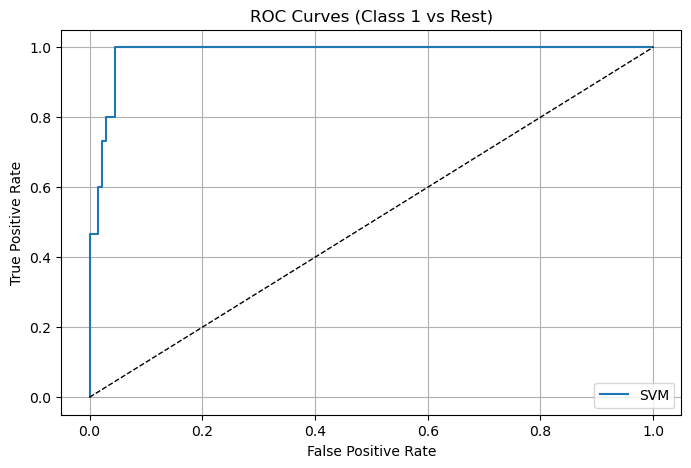

,Model,AUC (macro OvR)
0,SVC rbf,0.973547


In [35]:

# Ensure test labels are binarized for multi-class AUC computation
classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)

# Store ROC data and AUCs
roc_data = {}
auc_results = []

y_prob = model.predict_proba(X_test)

name = 'SVC rbf'

# Compute macro-average AUC
auc_macro = roc_auc_score(y_test_bin, y_prob, average="macro", multi_class="ovr")
auc_results.append({"Model": name, "AUC (macro OvR)": auc_macro})

# Compute ROC curve for one representative class (e.g., class 1)
class_index = 1 if 1 in classes else 0
fpr, tpr, _ = roc_curve(y_test_bin[:, class_index], y_prob[:, class_index])
roc_data[name] = (fpr, tpr)

# Create ROC plot (for class 1 vs rest)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="SVM")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Class 1 vs Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Display AUC summary table
auc_df = pd.DataFrame(auc_results).sort_values(by="AUC (macro OvR)", ascending=False).reset_index(drop=True)
display(auc_df)

In [16]:
def closestN(X_array, n):
    # array of sample distances to the hyperplane
    dists = svm_rbf_clf.decision_function(X_array)
    # absolute distance to hyperplane
    absdists = np.abs(dists)

    return absdists.argsort()[:n]

In [17]:

closest_samples = closestN(X_test, 5)

print(closest_samples)


[[4 0 3 1 2]
 [0 1 2 3 4]
 [4 3 0 2 1]
 [4 3 0 1 2]
 [0 4 1 2 3]]
